In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the training set
dataset_train = pd.read_csv('/content/drive/MyDrive/HPC/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [8]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [32]:
 #Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [33]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [34]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [35]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [36]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [37]:
import time
import keras

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [38]:
time_callback = TimeHistory()

In [39]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,  callbacks=[time_callback])



Epoch 1/100
62/62 [==============================] - 15s 118ms/step - loss: 0.0283
Epoch 2/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0033
Epoch 4/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0029
Epoch 5/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0027
Epoch 6/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0029
Epoch 7/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0018
Epoch 13/100

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/HPC/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[120.8842 ],
       [181.6872 ],
       [221.02034],
       [232.38405],
       [232.84361],
       [237.00089],
       [240.37517],
       [238.49042],
       [235.91133],
       [229.01125],
       [225.70204],
       [225.39516],
       [221.24957],
       [223.61607],
       [229.35895],
       [235.55136]], dtype=float32)

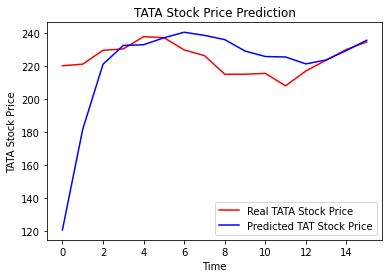

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
# regressor.save("Model")

In [13]:
# regressor.save("/content/drive/MyDrive/HPC/Model")
X_train.shape[1]

60

In [12]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))


In [14]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/HPC/Model')

In [15]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/HPC/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
# Getting the predicted stock price of 2017
dataset_total_2 = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total_2[len(dataset_total_2) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)


In [17]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[120.8842 ],
       [181.6872 ],
       [221.02034],
       [232.38405],
       [232.84361],
       [237.00089],
       [240.37515],
       [238.49042],
       [235.91133],
       [229.01125],
       [225.70203],
       [225.39516],
       [221.24959],
       [223.61607],
       [229.35895],
       [235.55136]], dtype=float32)

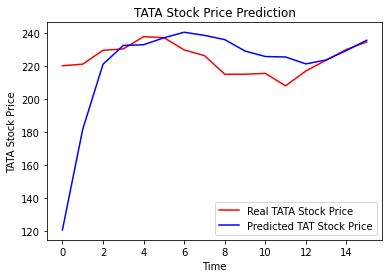

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
left = []
for i in range(len(time_callback.times)):
  left.append(i+1)

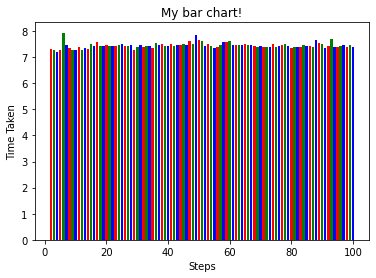

In [41]:
import matplotlib.pyplot as plt

# left = [1, 2, 3, 4, 5]

height = time_callback.times
  
# labels for bars
# tick_label = ['one', 'two', 'three', 'four', 'five']
  
# plotting a bar chart
plt.bar( left[1:],height[1:],width = 0.8, color = ['red', 'green', "blue"])
  
# naming the x-axis
plt.xlabel('Steps')
# naming the y-axis
plt.ylabel('Time Taken')
# plot title
plt.title('My bar chart!')
  
# function to show the plot
plt.show()

In [42]:
print("Average = " , sum(time_callback.times)/len(time_callback.times))

Average =  7.518634436130523


In [46]:
epochs = [50,100,150,200,250,300]
batch_size = [8,16,32,64,128,256]

In [47]:
time_epochs = []

In [48]:
import time
for i in epochs:
  start_time = time.time()
  # Adding the output layer
  regressor.add(Dense(units = 1))

  # Compiling the RNN
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

  # Fitting the RNN to the Training set
  history = regressor.fit(X_train, y_train, epochs = i, batch_size = 32 )
  time_epochs.append(time.time() - start_time)

Epoch 1/50
62/62 [==============================] - 14s 115ms/step - loss: 0.0431
Epoch 2/50
62/62 [==============================] - 7s 116ms/step - loss: 0.0061
Epoch 3/50
62/62 [==============================] - 7s 115ms/step - loss: 0.0016
Epoch 4/50
62/62 [==============================] - 7s 117ms/step - loss: 0.0016
Epoch 5/50
62/62 [==============================] - 8s 121ms/step - loss: 0.0018
Epoch 6/50
62/62 [==============================] - 7s 121ms/step - loss: 0.0012
Epoch 7/50
62/62 [==============================] - 7s 119ms/step - loss: 0.0011
Epoch 8/50
62/62 [==============================] - 7s 117ms/step - loss: 9.7910e-04
Epoch 9/50
62/62 [==============================] - 7s 116ms/step - loss: 0.0010
Epoch 10/50
62/62 [==============================] - 7s 117ms/step - loss: 0.0010
Epoch 11/50
62/62 [==============================] - 7s 118ms/step - loss: 8.9152e-04
Epoch 12/50
62/62 [==============================] - 7s 116ms/step - loss: 9.1006e-04
Epoch 13/50


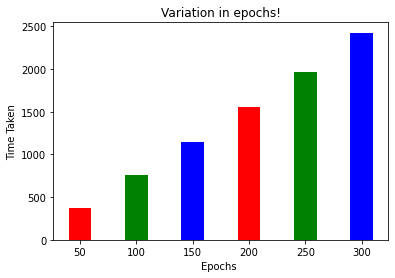

In [49]:
import matplotlib.pyplot as plt

plt.bar( epochs,time_epochs,width = 20, color = ['red', 'green', "blue"])
  
# naming the x-axis
plt.xlabel('Epochs ')
# naming the y-axis
plt.ylabel('Time Taken')
# plot title
plt.title('Variation in epochs!')
  
# function to show the plot
plt.show()

In [50]:
time_batch = []

In [51]:
import time
for i in batch_size:
  start_time = time.time()
  # Adding the output layer
  regressor.add(Dense(units = 1))

  # Compiling the RNN
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

  # Fitting the RNN to the Training set
  history = regressor.fit(X_train, y_train, epochs = 100, batch_size = i )
  time_batch.append(time.time() - start_time)

Epoch 1/100
247/247 [==============================] - 31s 93ms/step - loss: 0.0806
Epoch 2/100
247/247 [==============================] - 23s 94ms/step - loss: 0.0192
Epoch 3/100
247/247 [==============================] - 23s 94ms/step - loss: 0.0037
Epoch 4/100
247/247 [==============================] - 23s 93ms/step - loss: 0.0023
Epoch 5/100
247/247 [==============================] - 23s 94ms/step - loss: 0.0023
Epoch 6/100
247/247 [==============================] - 24s 95ms/step - loss: 0.0019
Epoch 7/100
247/247 [==============================] - 23s 94ms/step - loss: 0.0016
Epoch 8/100
247/247 [==============================] - 23s 94ms/step - loss: 0.0015
Epoch 9/100
247/247 [==============================] - 23s 93ms/step - loss: 0.0013
Epoch 10/100
247/247 [==============================] - 23s 93ms/step - loss: 0.0014
Epoch 11/100
247/247 [==============================] - 23s 94ms/step - loss: 0.0013
Epoch 12/100
247/247 [==============================] - 23s 93ms/step - lo

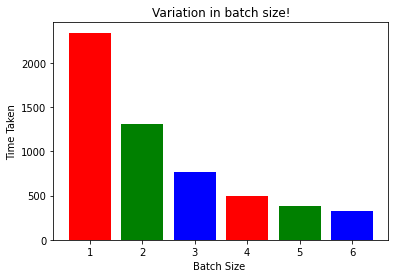

In [52]:
import matplotlib.pyplot as plt

plt.bar( [1,2,3,4,5,6],time_batch,width = 0.8, color = ['red', 'green', "blue"])
  
# naming the x-axis
plt.xlabel('Batch Size ')
# naming the y-axis
plt.ylabel('Time Taken')
# plot title
plt.title('Variation in batch size!')
  
# function to show the plot
plt.show()

In [53]:
time_batch

[2338.4703731536865,
 1311.2113440036774,
 769.5540792942047,
 498.8238003253937,
 385.72358775138855,
 325.84753942489624]

In [54]:
time_epochs

[371.3688442707062,
 759.7471606731415,
 1141.3886785507202,
 1550.3176546096802,
 1963.4198977947235,
 2424.1472334861755]